In [1]:
import pandas as pd
import json
import re

# 4chan -> Low level moderation (moderation varies from board to board but in escence all illegal related content is removed), aside from ilegal content, the board is also moderated for spam and other types of abuse. The majority of speech aside from that is allowed.

## Cleaning text and performing a base level analysis

In [2]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('../Data/data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [3]:
df.head()

title  \
0  All the cool kids are doing it.   
1  All the cool kids are doing it.   
2  All the cool kids are doing it.   
3  All the cool kids are doing it.   
4  All the cool kids are doing it.   

                                             comment  
0  &gt;&gt;400714173&gt;no pepe what are you doin...  
1  &gt;&gt;400708757https://www.youtube.com/watch...  
2  &gt;&gt;400713918&gt;if you don&#039;t like th...  
3  &gt;&gt;400708823And I wonder how many big ole...  
4  &gt;&gt;400714594Vatniggers get into the meat ...

In [4]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [5]:
# clean the text from 'title' and 'comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Remove any website links
    text = re.sub(r'http\S+', '', text)
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3 and 'quot' not in token.text]
    return text

In [6]:
# apply the clean_text function to the dataframe
# df['title'] = df['title'].apply(clean_text)
df['comment'] = df['comment'].apply(clean_text)

In [7]:
# remove comments with less than 3 words
df = df[df['comment'].apply(lambda x: len(x) > 3)]

In [8]:
df.head()

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  
2   [richard, spencer, tier, opposition, ukrainian...  
3   [many, brains, titanic, imagery, their, meme, ...  
7                         [they, black, nobody, this]  
9   [bitch, your, good, women, physical, mental, h...  
13          [this, paper, everything, italy, crooked]

In [9]:
# lets create a new column with the length of the comment
df['length'] = df['comment'].apply(lambda x: len(x))

In [10]:
df.shape

(6285, 3)

## Sentiment and Subjectivity Analysis

In [11]:
# lets analyze the sentiment of the comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [12]:
# lets create a new column with the sentiment of the comment
df['sentiment'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

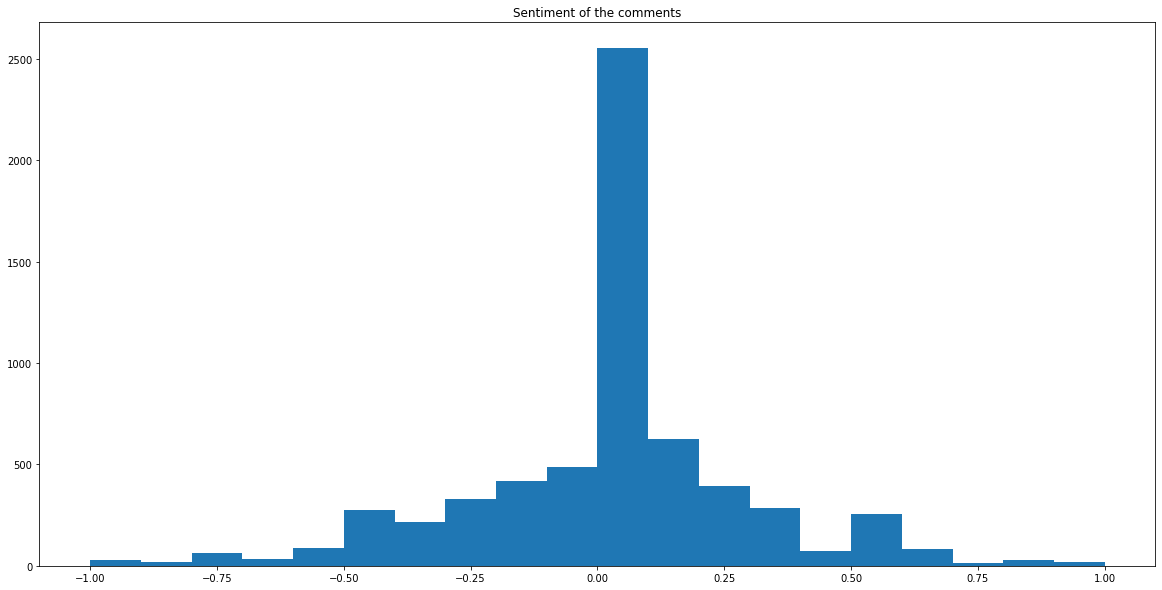

In [13]:
# lets plot the sentiment of the comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(df['sentiment'], bins=20)
plt.title('Sentiment of the comments')
plt.show()

In [14]:
# show 5 samples of negative comments, in which sentiment is less than -0.5
df[df['sentiment'] < -0.5].sample(5)

title  \
5703  Latinas will be the death of the white race… L...   
7035  Do they think they are going to stop following...   
2881                                           Curious.   
7073                                        /pol/ humor   
869   Biggest glownigger op on /pol/ is Feds encoura...   

                                                comment  length  sentiment  
5703  [ugly, women, abortions, anything, ugly, women...      19  -0.533333  
7035             [christkike, anglo, world, disgusting]       4  -1.000000  
2881  [what, other, gems, braindead, retard, marvel,...       8  -0.512500  
7073    [kekold, oldfag, keki, effort, matrix, fucking]       6  -0.600000  
869                   [what, maga, rank, church, satan]       5  -0.800000

In [15]:
# show 5 samples of positive comments, in which sentiment is greater than 0.5
df[df['sentiment'] > 0.5].sample(5)

title  \
2077   He is running his company into the ground. So ...   
10002  How did it take only one kike to ruin the publ...   
6294   What country is the best to raise white daught...   
6420   Daily reminder: Fascism and conservatism are o...   
2567   should women be allowed to be cops according t...   

                                                 comment  length  sentiment  
2077   [shitty, mmorpg, something, revolutionary, lma...       7   0.550000  
10002        [good, source, number, exporter, potassium]       5   0.700000  
6294             [poland, portugal, good, options, asia]       5   0.700000  
6420   [good, person, slave, regimei, your, understan...       7   0.700000  
2567   [favorite, thing, video, spritit, more, brisk,...       9   0.533333

In [16]:
# lets create a new column with the subjectivity of the comment
df['subjectivity'] = df['comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

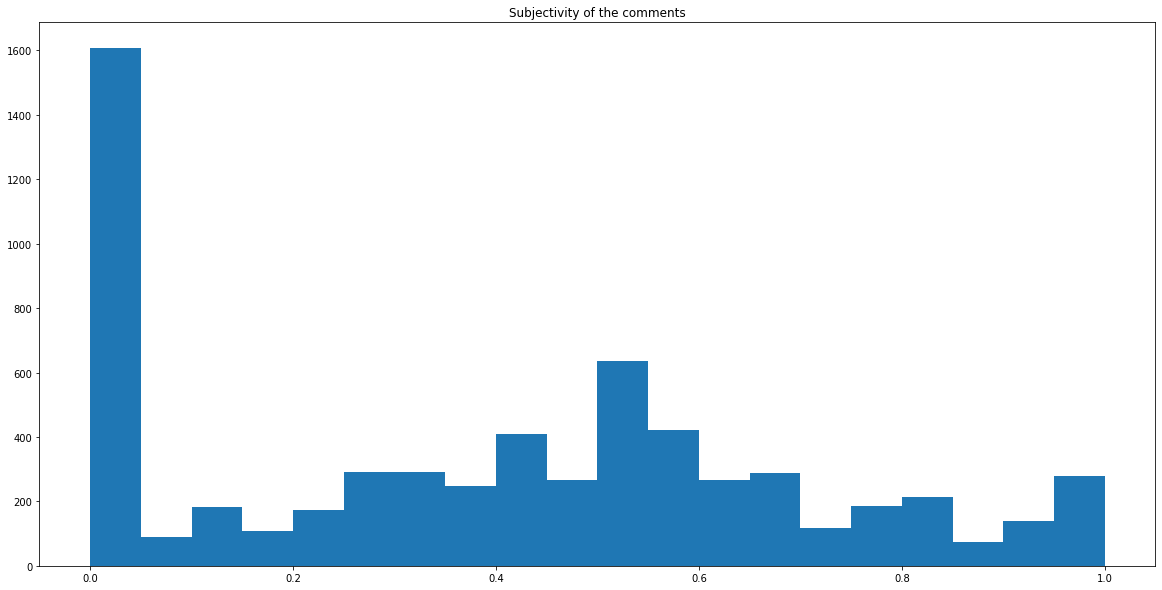

In [17]:
# lets plot the subjectivity of the comments
plt.figure(figsize=(20, 10))
plt.hist(df['subjectivity'], bins=20)
plt.title('Subjectivity of the comments')
plt.show()

In [18]:
# show 5 samples of subjective comments, in which subjectivity is greater than 0.5
df[df['subjectivity'] > 0.5].sample(5)

title  \
8204   How can this mofo own mutiple billion dollar c...   
8528   &gt;My name is not important. What is importan...   
664    &gt; Which famous british right-wing youtuber ...   
10679  student dresses up in east german soviet unifo...   
10009  STOP FLOODING THIS BOARD WITH YOUR FUCKING NIG...   

                                                 comment  length  sentiment  \
8204   [what, businesses, courts, everyone, words, ac...       9  -0.133333   
8528   [kikes, genitals, innocent, children, demonic,...      14  -0.250000   
664          [many, different, stories, tiresome, point]       5   0.000000   
10679  [commie, uniform, screams, naziits, tiresome, ...       6  -0.500000   
10009  [nigger, that, mindwhy, americans, niggers, yo...      16  -0.050000   

       subjectivity  
8204        0.82963  
8528        0.85000  
664         0.70000  
10679       1.00000  
10009       0.82500

In [19]:
# show 5 samples of objective comments, in which subjectivity is less than 0.5
df[df['subjectivity'] < 0.5].sample(5)

title  \
4864  The trial of the deadliest school shooter to e...   
1079       You seen nothinghttps://t.me/iswnews_ru/5276   
1781              Now he must visit the Holohoax museum   
517     Miss him so much bros. Will he make a comeback?   
8957  The shills aren&#039;t arguing against us any ...   

                                                comment  length  sentiment  \
4864  [formatting, emphasis, cali, shitlib, funnier,...       6   0.000000   
1079                  [shit, slow, useless, them, kekw]       5  -0.333333   
1781  [holocaust, museum, several, charities, they, ...      10  -0.300000   
517                         [hope, time, russian, nuke]       4   0.000000   
8957                      [jesuits, youtu, whir, ifqao]       4   0.000000   

      subjectivity  
4864      0.000000  
1079      0.466667  
1781      0.400000  
517       0.000000  
8957      0.000000

82847


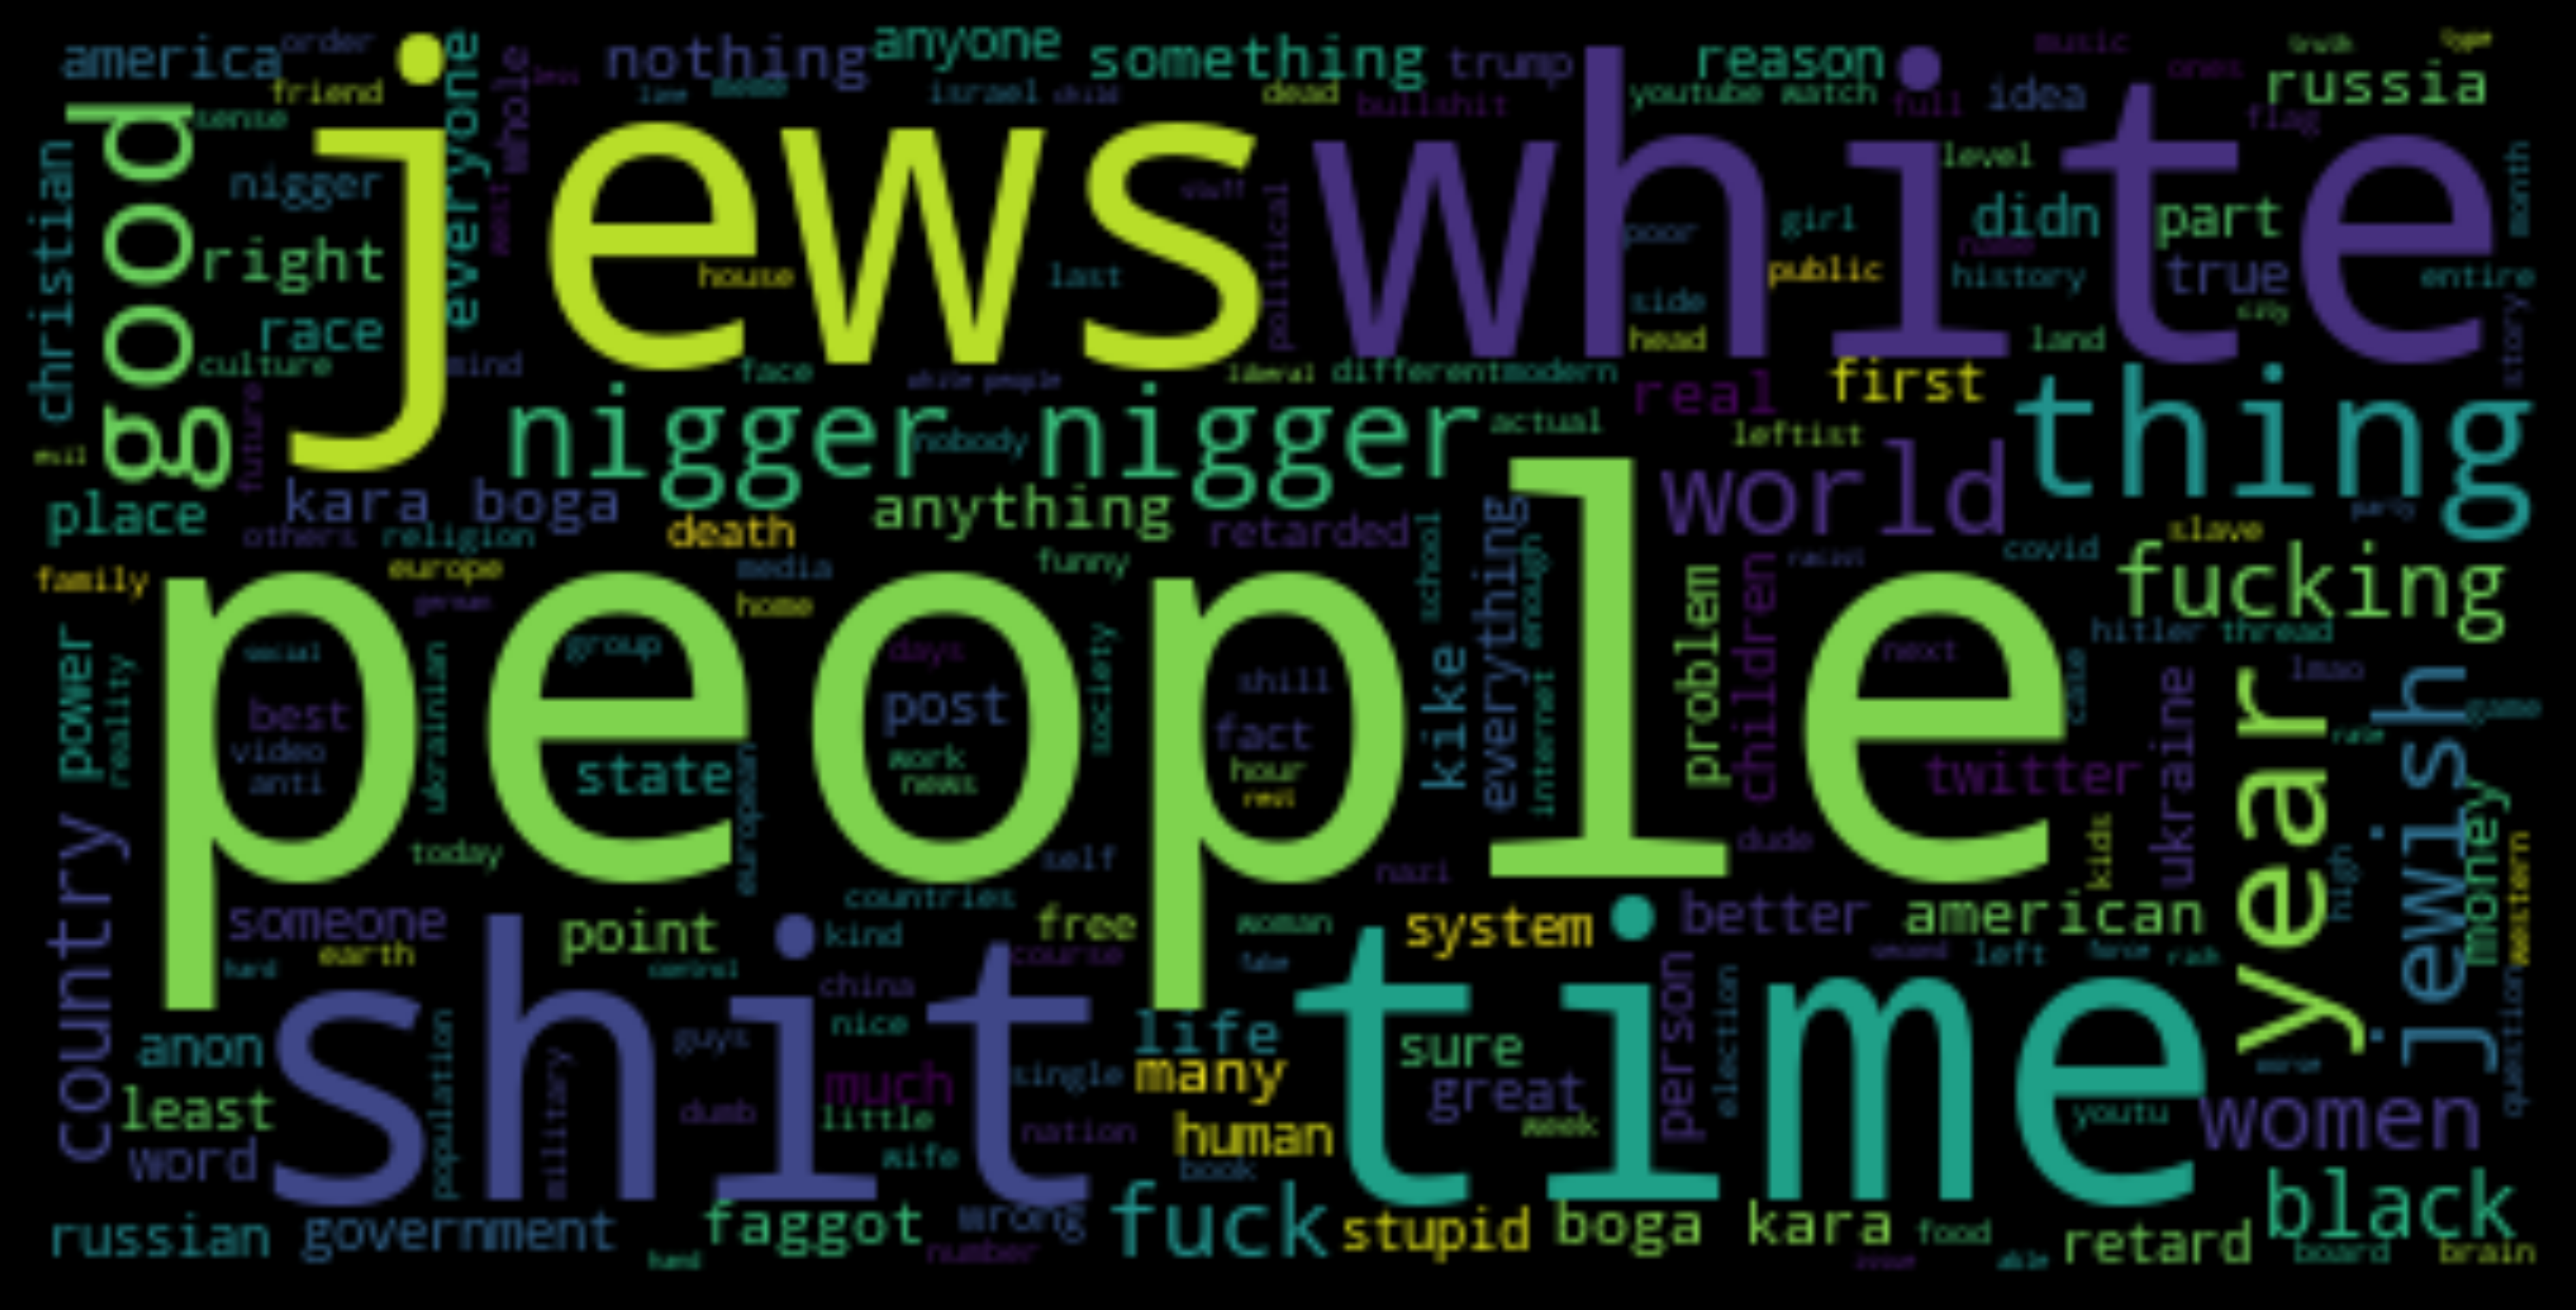

In [20]:
# lets create a word cloud of the most common words in the comments
from wordcloud import WordCloud

# create a string of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.extend(comment)

print(len(all_comments)) # the number of unique words in the comments

# create a word cloud object
wordcloud = WordCloud().generate(' '.join(all_comments))

# plot the word cloud, make it larger
plt.figure(figsize=(15,10), facecolor='k', dpi=320, edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

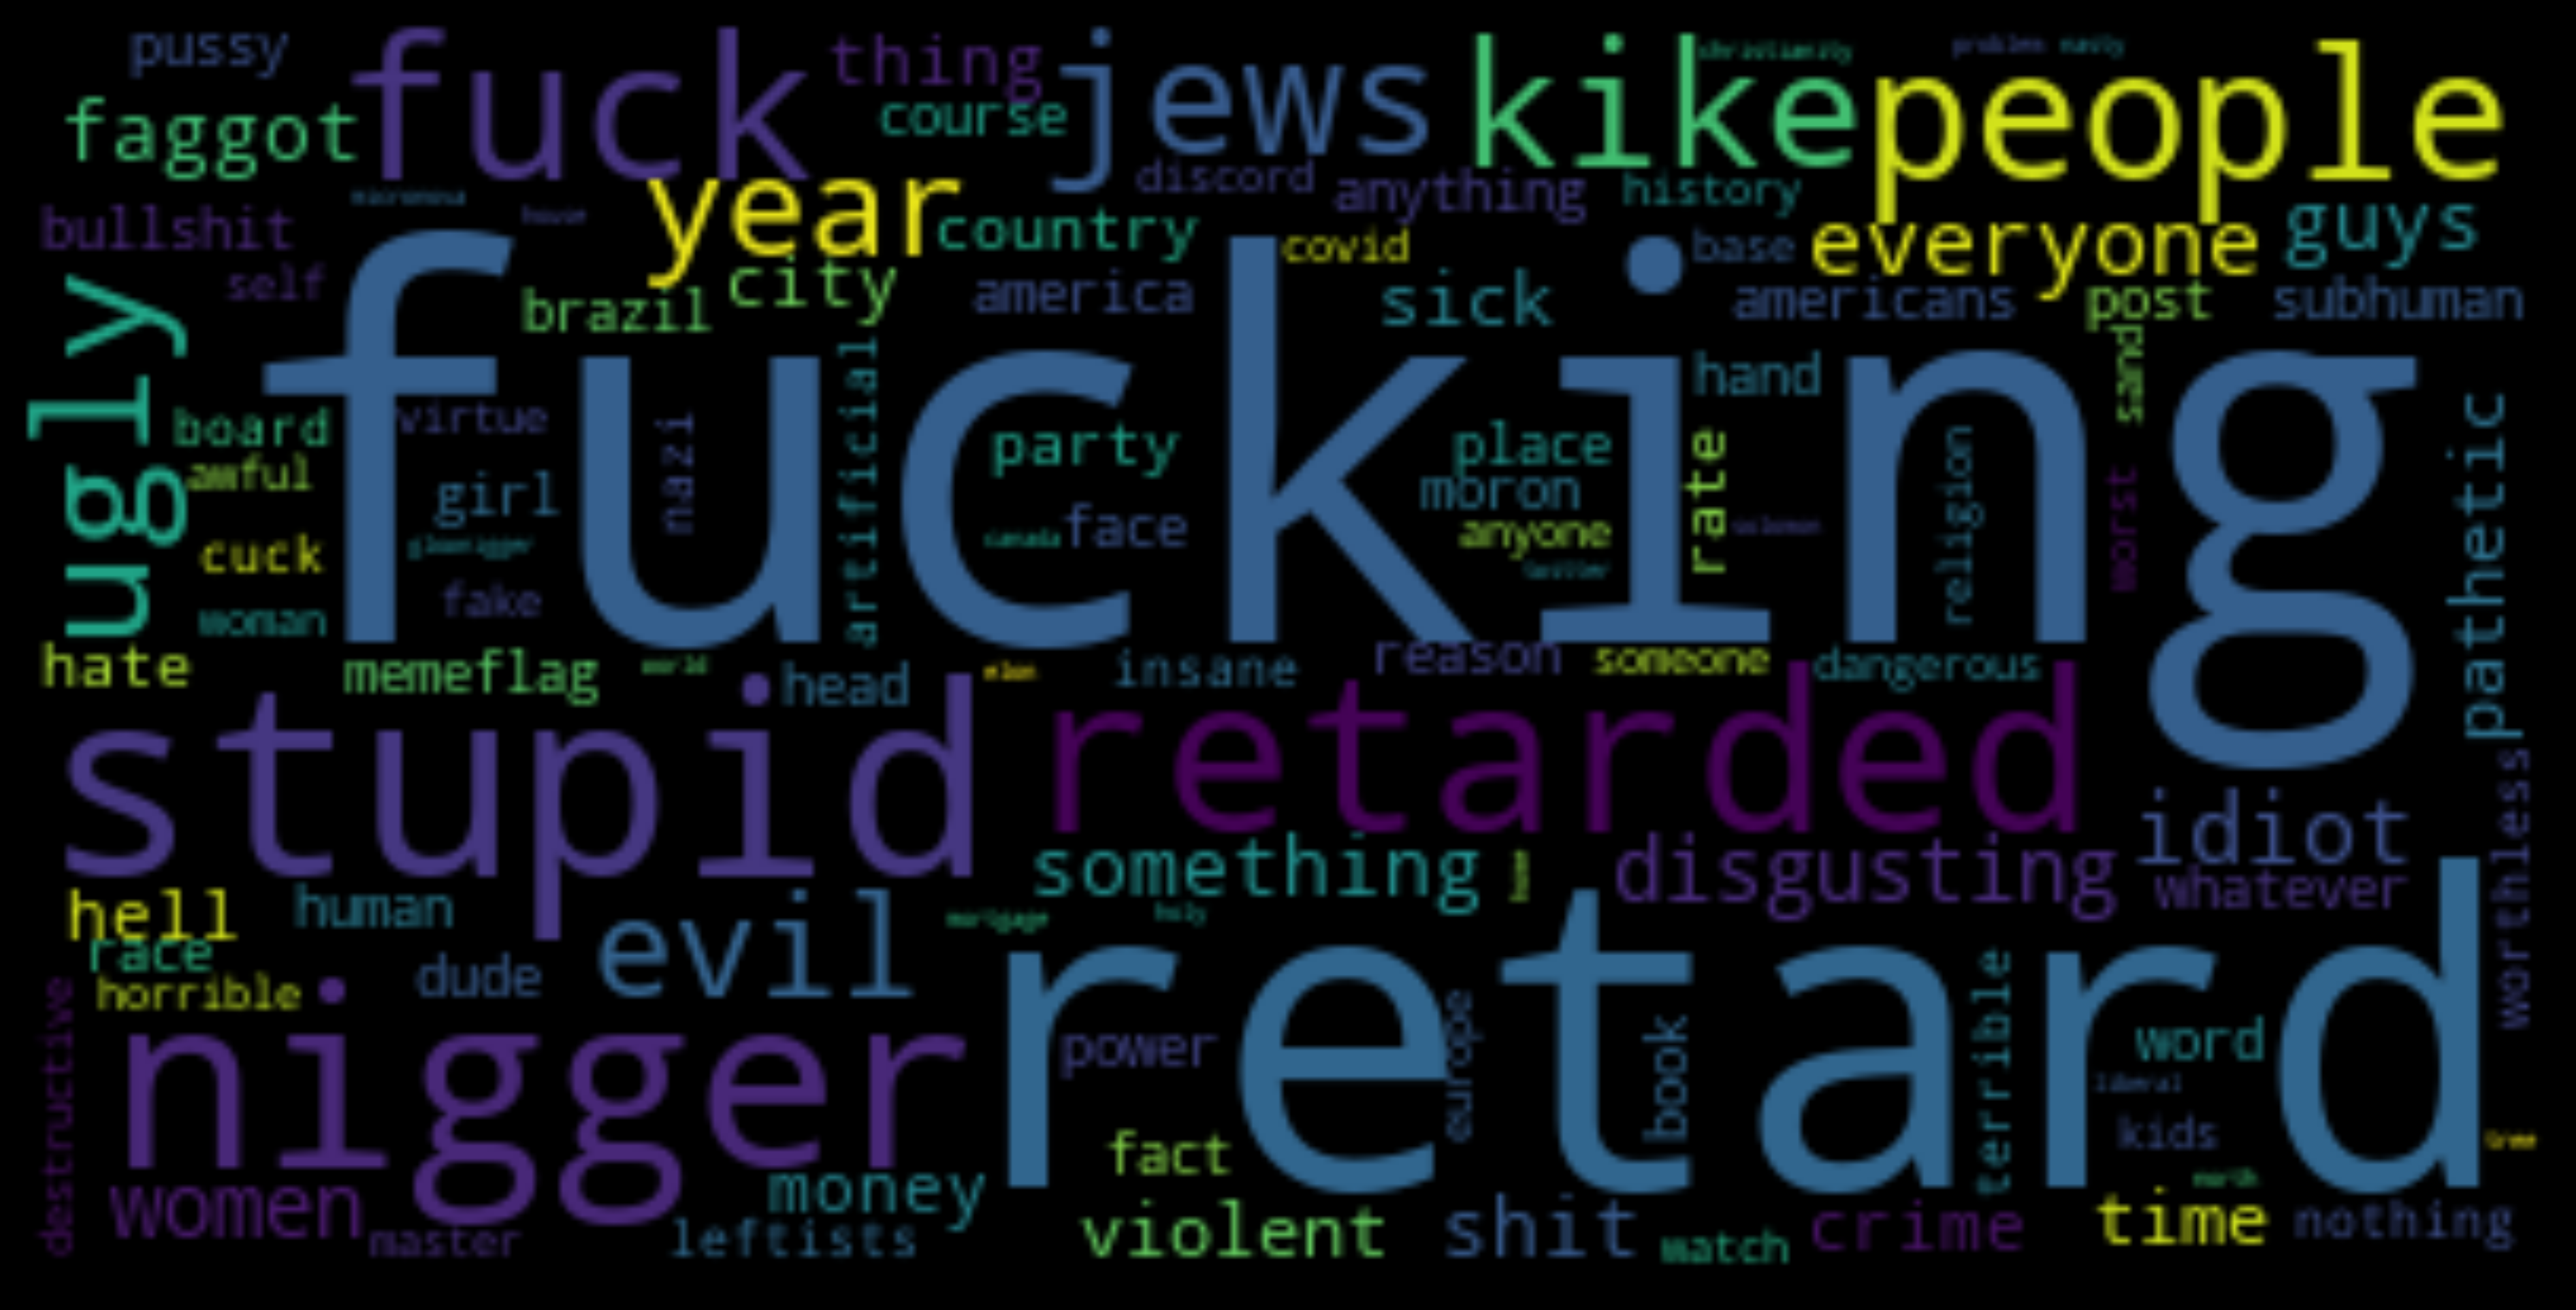

In [21]:
# lets create a word cloud of the most common words in the comments, but only for negative comments
negative_comments = ' '.join(df[df['sentiment'] < -0.5]['comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_comments)

plt.figure(figsize=(15,10), facecolor='k', dpi=320, edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# check how many unique words are in the comments
total_unique = len(all_comments)

total_words = 0
for comment in df['comment']:
    total_words += len(comment)

# average unique words per comment
unique_words_by_comment = total_unique / total_words
unique_words_by_comment

1.0

In [23]:
total_words

82847

In [24]:
# check how many average words are in the comments
average_words_by_comment = sum(df['length']) / len(df)
average_words_by_comment

13.18170246618934

## Hate Analysis in 4chan: A Case Study
### We scraped data from -> https://en.wikipedia.org/wiki/List_of_ethnic_slurs to generate a hate term corpus which then we used to calculate hate scores for each post in 4chan. Then we calculated the hate score for each thread and plotted the results.

In [25]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../../GeneralData/ethnic_slurs.csv')
df_hate.head(20)

Term  \
0                                     abbie abe abie    
1                                                abc    
2                                               abcd    
3                                   abidabeed plural    
4                                            aboabbo    
5   afro engineering african engineering or nigger...   
6                                            ah chah    
7                                           ali baba    
8                          alligator bait gator bait    
9                                        alpine serb    
10                                            ang mo    
11                                               ann    
12                                    annamite mites    
13                                               ape    
14                                             apple    
15                                   arabush aravush    
16                                argieargies plural    
17                                              armo    
18                                       asing aseng    
19                                         ashkenazi    

                                             Location  \
0                                      north america    
1                                          east asia    
2                             south asians in the us    
3                       middle east and north africa    
4                                          australia    
5                                      united states    
6                                          hong kong    
7                                      united states    
8   united states more commonly used in states whe...   
9            serbocroatian alpski srbin exyugoslavia    
10                                malaysia singapore    
11                                     north america    
12                                    french english    
13                                     united states    
14                                     north america    
15                                            israel    
16                                    united kingdom    
17                                     united states    
18                                         indonesia    
19                                            israel    

                                               Target  \
0                                         jewish men    
1   americanborn chinese han or other chinese incl...   
2   americanborn confused desi indian americans or...   
3                               black african people    
4                       australian aboriginal person    
5                              black american people    
6                                 south asian people    
7                                       iraqi people    
8             black people especially black children    
9                         people of slovenian origin    
10           european people especially dutch people    
11               white women whiteacting black women    
12                                 vietnamese people    
13                                      black people    
14                                  native americans    
15                                             arabs    
16                                  argentine people    
17                         armenianarmenian american    
18    nonindonesian people especially chinese people    
19                                    ashkenazi jews    

                                              Meaning  
0   originated before the 1950s from the proper na...  
1   the term implies an otherness or lack of conne...  
2   used chiefly by south asian immigrants to impl...  
3   arabic for slave associated with the arab slav...  
4   originally this was simply an informal term fo...  
5   shoddy secondrate or unconventional makeshift ...  
6   from cantonese yale ach from acch meaning good...  
7      

In [26]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

Term  \
0                                     abbie abe abie    
1                                                abc    
2                                               abcd    
3                                   abidabeed plural    
4                                            aboabbo    
5   afro engineering african engineering or nigger...   
6                                            ah chah    
7                                           ali baba    
8                          alligator bait gator bait    
9                                        alpine serb    
10                                            ang mo    
11                                               ann    
12                                    annamite mites    
13                                               ape    
14                                             apple    
15                                   arabush aravush    
16                                argieargies plural    
17                                              armo    
18                                       asing aseng    
19                                         ashkenazi    

                                             Location  \
0                                       north america   
1                                           east asia   
2                              south asians in the us   
3                        middle east and north africa   
4                                           australia   
5                                       united states   
6                                           hong kong   
7                                       united states   
8   united states more commonly used in states whe...   
9             serbocroatian alpski srbin exyugoslavia   
10                                 malaysia singapore   
11                                      north america   
12                                     french english   
13                                      united states   
14                                      north america   
15                                             israel   
16                                     united kingdom   
17                                      united states   
18                                          indonesia   
19                                             israel   

                                               Target  \
0                                         jewish men    
1   americanborn chinese han or other chinese incl...   
2   americanborn confused desi indian americans or...   
3                               black african people    
4                       australian aboriginal person    
5                              black american people    
6                                 south asian people    
7                                       iraqi people    
8             black people especially black children    
9                         people of slovenian origin    
10           european people especially dutch people    
11               white women whiteacting black women    
12                                 vietnamese people    
13                                      black people    
14                                  native americans    
15                                             arabs    
16                                  argentine people    
17                         armenianarmenian american    
18    nonindonesian people especially chinese people    
19                                    ashkenazi jews    

                                              Meaning  
0   originated before the 1950s from the proper na...  
1   the term implies an otherness or lack of conne...  
2   used chiefly by south asian immigrants to impl...  
3   arabic for slave associated with the arab slav...  
4   originally this was simply an informal term fo...  
5   shoddy secondrate or unconventional makeshift ...  
6   from cantonese yale ach from acch meaning good...  
7      

In [27]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [28]:
# check if the comments contain any of the hate words
hate_score = []
for comment in df['comment']:
    hate_count = 0
    for content in comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   

    subjectivity  hate_score  
2       0.300000           1  
3       0.650000           0  
7       0.433333           1  
9       0.314286           0  
13      0.100000           0

In [29]:
df.head(20)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   
21  If the Russians haven&#039;t adequately mainta...   
22  If the Russians haven&#039;t adequately mainta...   
24  If the Russians haven&#039;t adequately mainta...   
25  How are /pol/‘s paranoid schizos explaining th...   
26  Kanye West is a controlled opposition deceiver...   
27  Kanye West is a controlled opposition deceiver...   
29  Kanye West is a controlled opposition deceiver...   
31  Previous: &gt;&gt;400700588Timeline /tug/: htt...   
33  Previous: &gt;&gt;400700588Timeline /tug/: htt...   
34  Previous: &gt;&gt;400700588Timeline /tug/: htt...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   
21  [jajajaja, your, dick, retarded, piece, shit, ...       7  -0.500000   
22  [russians, nuclear, triad, country, bankrupt, ...      36  -0.166667   
24           [false, premise, russian, army, ukraine]       5  -0.200000   
25  [israel, damned, they, they, they, ways, sabbath]       7   0.000000   
26  [gematriaeffect, newsgematrinator, comfreetofi...       4   0.000000   
27  [faggot, that, need, favorite, celebrity, that...       9   0.250000   
29           [kike, anon, kikeholy, pathetic, topkek]       5  -1.000000   
31  [blackie, they, there, riots, year, good, time...       8   0.700000   
33  [exciting, fact, there, wild, concept, mutt, c...      16   0.027778   
34    [they, laws, niggers, place, private, security]       6   0.000000   

    subjectivity  hate_score  
2       0.300000           1  
3       0.650000           0  
7       0.433333           1  
9       0.314286           0  
13      0.100000           0  
14      0.000000           4  
16      0.150000           2  
17      0.408333           1  
18      0.500000           1  
19      0.750000           2  
21      0.800000           0  
22      0.700000           4  
24      0.300000           1  
25      0.000000           0  
26      0.000000           0  
27      0.500000           1  
29      1.000000           2  
31      0.600000           1  
33      0.500000           1  
34      0.375000           1

In [30]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score', ascending=False).head(5)

title  \
9674  What did Kanye mean by this, is /pol/ comprise...   
4982  He is mostly known for not being Michael Jorda...   
5093  your corrupt right wing politicians are crumbl...   
3764                         What do I put on it /pol/?   
7770  &gt;read reddit&gt;everybody is predicting a b...   

                                                comment  length  sentiment  \
9674  [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
4982  [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
5093  [this, spam, thread, faggot, niggers, obvious,...      88   0.000000   
3764  [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
7770  [king, kanye, west, settlement, former, employ...     118  -0.069805   

      subjectivity  hate_score  
9674      0.000000         156  
4982      0.000000         113  
5093      0.500000          22  
3764      0.000000          16  
7770      0.325974          15

In [31]:
# Get the percentage of hate score devided by the total length of the comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   

    subjectivity  hate_score  hate_score_percentage  
2       0.300000           1                   12.5  
3       0.650000           0                    0.0  
7       0.433333           1                   25.0  
9       0.314286           0                    0.0  
13      0.100000           0                    0.0

### Percentage of Hate Score out of total comments -> 6.02%

In [32]:
# get the sum of the total hate score / sum of the total length of the comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'6.15%'

In [33]:
# get the top 5 rows with the highest hate score percentage, where length > 5
df[df['length'] > 5].sort_values(by='hate_score_percentage', ascending=False).head(7)

title  \
4982   He is mostly known for not being Michael Jorda...   
3764                          What do I put on it /pol/?   
9674   What did Kanye mean by this, is /pol/ comprise...   
9269   I repeat REDDIT IS DOWNI don&#039;t use other ...   
1940   Intredasting we are not having BBC treads righ...   
10840  South Africa: puts up big fence and fears nigg...   
7889   He says that Jews are racially superior to all...   

                                                 comment  length  sentiment  \
4982   [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
3764   [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
9674   [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
9269   [niggernigger, nigger, nigger, niggernigger, n...      11   0.000000   
1940     [white, male, japanese, korean, female, thread]       6   0.000000   
10840  [west, niggers, western, hitler, american, ant...       9   0.000000   
7889   [sandcoons, easy, yourself, superior, brown, s...       7   0.566667   

       subjectivity  hate_score  hate_score_percentage  
4982       0.000000         113             100.000000  
3764       0.000000          16             100.000000  
9674       0.000000         156             100.000000  
9269       0.000000          10              90.909091  
1940       0.066667           5              83.333333  
10840      0.000000           6              66.666667  
7889       0.866667           4              57.142857

### Analysing offensive speech

In [34]:
# load csv as list
import csv
with open('../../GeneralData/offensive_words.csv', 'r') as f:
    reader = csv.reader(f)
    offensive_words = list(reader)[1:]

offensive_words = [word[0] for word in offensive_words]
offensive_words

['arse',
 'arsehead',
 'arsehole',
 'ass',
 'asshole',
 'bastard',
 'bithc',
 'bloody',
 'blood',
 'bollocks',
 'brotherfucker',
 'bugger',
 'bullshit',
 'childfucker',
 'cock',
 'cocksucker',
 'crap',
 'cunt',
 'damn',
 'dick',
 'dickhead',
 'dyke',
 'fatherfucker',
 'frigger',
 'fuck',
 'goddamn',
 'godsdamn',
 'hell',
 'holy shit',
 'horseshit',
 'jesus fuck',
 'kike',
 'motherfucker',
 'nigga',
 'nigra',
 'nigger',
 'piss',
 'prick',
 'pussy',
 'shit',
 'shit ass',
 'shite',
 'sisterfucker',
 'slut',
 'son of a bithc',
 'son of a whore',
 'spastic',
 'twat',
 'wanker']

In [35]:
# check if the comments contain any of the offensive words
offensive_score = []
for comment in df['comment']:
    offensive_count = 0
    for content in comment:
        for word in offensive_words:
            if word in content:
                offensive_count += 1

    offensive_score.append(offensive_count)

# add the offensive score to the dataframe
df['offensive_score'] = offensive_score
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  
2       0.300000           1              12.500000                0  
3       0.650000           0               0.000000                1  
7       0.433333           1              25.000000                0  
9       0.314286           0               0.000000                0  
13      0.100000           0               0.000000                0  
14      0.000000           4              23.529412                1  
16      0.150000           2              16.666667                0  
17      0.408333           1               9.090909                0  
18      0.500000           1               6.250000                0  
19      0.750000           2               7.142857                8

In [36]:
# get the top 10 rows with the highest offensive score
df.sort_values(by='offensive_score', ascending=False).head(10)

title  \
9674  What did Kanye mean by this, is /pol/ comprise...   
4982  He is mostly known for not being Michael Jorda...   
5093  your corrupt right wing politicians are crumbl...   
3764                         What do I put on it /pol/?   
2364  Previous: &gt;&gt;402026522Timeline /tug/: htt...   
9269  I repeat REDDIT IS DOWNI don&#039;t use other ...   
4707  My top 3 most redpilled songs:Saint PabloNew S...   
749   Let&#039;s have a discussion about literal ver...   
973                           Why do you hate me, anon?   
19    This is what happens when you pay them $15 an ...   

                                                comment  length  sentiment  \
9674  [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
4982  [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
5093  [this, spam, thread, faggot, niggers, obvious,...      88   0.000000   
3764  [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
2364  [hahahahahahahahahaaahjahahhhhhhhhhhhhhhahahah...      75   0.008036   
9269  [niggernigger, nigger, nigger, niggernigger, n...      11   0.000000   
4707  [that, pussy, niggas, pussy, contracts, meyou,...      26   0.000000   
749   [slaves, butthurt, rebellion, higher, dimensio...      98   0.036458   
973   [holy, shit, mindsi, stupid, kike, fuckface, l...      42  -0.301667   
19    [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

      subjectivity  hate_score  hate_score_percentage  offensive_score  
9674      0.000000         156             100.000000              156  
4982      0.000000         113             100.000000              113  
5093      0.500000          22              25.000000               22  
3764      0.000000          16             100.000000               16  
2364      0.619643           0               0.000000               12  
9269      0.000000          10              90.909091               10  
4707      0.000000           0               0.000000               10  
749       0.526389           9               9.183673               10  
973       0.591667           4               9.523810                9  
19        0.750000           2               7.142857                8

In [37]:
percentage_total_offensive = df['offensive_score'].sum() / df['length'].sum() * 100
f"{percentage_total_offensive:.2f}%"

'3.80%'

### Violence Analysis

In [38]:
# Read Csv as list
with open('../../GeneralData/violent_words.csv', 'r') as f:
    reader = csv.reader(f)
    violent_words = list(reader)[1:]

violent_words = [word[0] for word in violent_words]
violent_words

['acid',
 'aggressor',
 'agitator',
 'aim',
 'alert',
 'ambush',
 'ammunition',
 'anarchy',
 'anguish',
 'annihilate',
 'apartheid',
 'arms',
 'arsenal',
 'artillery',
 'assassin',
 'assassinate',
 'assault',
 'atrocity',
 'attack',
 'authority',
 'automatic',
 'faction',
 'fanatic',
 'fatal',
 'fear',
 'fearful',
 'felon',
 'ferment',
 'ferocious',
 'feud',
 'fierce',
 'fiery',
 'fight',
 'fighter',
 'force',
 'forceful',
 'forces',
 'fray',
 'frenzy',
 'front',
 'lines',
 'fuel',
 'fugitive',
 'furtive',
 'cadaver',
 'camouflage',
 'campaign',
 'captive',
 'capture',
 'careen',
 'carnage',
 'casualties',
 'cataclysm',
 'causes',
 'chaos',
 'charge',
 'charred',
 'checking',
 'clandestine',
 'clash',
 'coalition',
 'collapse',
 'combat',
 'commandos',
 'concentration',
 'concussion',
 'conflagration',
 'conflict',
 'confrontation',
 'conquer',
 'consequences',
 'consolidate',
 'conspiracy',
 'conspire',
 'control',
 'coordinates',
 'corpse',
 'counterattack',
 'countermand',
 'crash',

In [39]:
# check if the comments contain any of the violent words
violent_score = []
for comment in df['comment']:
    violent_count = 0
    for content in comment:
        for word in violent_words:
            if word in content:
                violent_count += 1

    violent_score.append(violent_count)

# add the violent score to the dataframe
df['violent_score'] = violent_score
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  \
2       0.300000           1              12.500000                0   
3       0.650000           0               0.000000                1   
7       0.433333           1              25.000000                0   
9       0.314286           0               0.000000                0   
13      0.100000           0               0.000000                0   
14      0.000000           4              23.529412                1   
16      0.150000           2              16.666667                0   
17      0.408333           1               9.090909                0   
18      0.500000           1               6.250000                0   
19      0.750000           2               7.142857                8   

    violent_score  
2               2  
3               1  
7               0  
9               0  
13              0  
14              3  
16              1  
17              0  
18              1  
19              5

In [40]:
percentage_total_violent = df['violent_score'].sum() / df['length'].sum() * 100
f"{percentage_total_violent:.2f}%"

'6.91%'

In [46]:
# Lets sample the top 10 violent comments
df.sort_values(by='violent_score', ascending=False).head(10)

title  \
2510  It&#039;s ok to be whiteWill you be partaking ...   
1228  Quantum Phonon Generation Method for Facilitat...   
6637  Previous: &gt;&gt;402726547Timeline /tug/: htt...   
2953  What if hitler was a kyke? what if the holocau...   
2511  It&#039;s ok to be whiteWill you be partaking ...   
2364  Previous: &gt;&gt;402026522Timeline /tug/: htt...   
3115  Even Reddit of all places is not buying it any...   
5888  Previous: &gt;&gt;402283693Timeline /tug/: htt...   
9184  What was his function in the NWO and demoraliz...   
5072                         he&#039;s not backing down   

                                                comment  length  sentiment  \
2510  [oklahoma, city, university, school, oklahoma,...     129  -0.118367   
1228  [that, closer, look, forces, electrons, atom, ...     133   0.242803   
6637  [they, pipes, nordic, return, norstream, attac...     117  -0.074603   
2953  [turbo, holocaust, narrative, jews, destructio...     126   0.047829   
2511  [jonathan, turley, radio, show, iotbw, jonatha...     112   0.025000   
2364  [hahahahahahahahahaaahjahahhhhhhhhhhhhhhahahah...      75   0.008036   
3115  [they, they, disproportional, amount, whites, ...      98   0.010667   
5888  [they, finnish, flags, back, alternative, russ...     111   0.039916   
9184  [fichte, education, free, pupils, school, they...     129   0.135913   
5072  [place, donda, academy, kids, school, that, sc...     117   0.070000   

      subjectivity  hate_score  hate_score_percentage  offensive_score  \
2510      0.586990           8               6.201550                0   
1228      0.482630           0               0.000000                0   
6637      0.459683          12              10.256410                2   
2953      0.542927           6               4.761905                0   
2511      0.366667           9               8.035714                0   
2364      0.619643           0               0.000000               12   
3115      0.342667          14              14.285714                0   
5888      0.296008           7               6.306306                1   
9184      0.594924           2               1.550388                0   
5072      0.379583           8               6.837607                0   

      violent_score  cluster  
2510             35        3  
1228             31        3  
6637             23        3  
2953             23        4  
2511             23        3  
2364             22        3  
3115             21        0  
5888             21        3  
9184             18        3  
5072             16        3

## Lets do some natural clustering analysis, let's see how many natural clusters we can find in the data

In [41]:
# Perform a natural clustering on the comments
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# create a list of all the comments
all_comments = list()
for comment in df['comment']:
    all_comments.append(' '.join(comment))

# create a tfidf vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer to the comments
X = vectorizer.fit_transform(all_comments)

# create a kmeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# fit the kmeans object to the vectorizer
kmeans.fit(X)

# get the cluster labels
labels = kmeans.labels_

# add the cluster labels to the dataframe
df['cluster'] = labels
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  \
2       0.300000           1              12.500000                0   
3       0.650000           0               0.000000                1   
7       0.433333           1              25.000000                0   
9       0.314286           0               0.000000                0   
13      0.100000           0               0.000000                0   
14      0.000000           4              23.529412                1   
16      0.150000           2              16.666667                0   
17      0.408333           1               9.090909                0   
18      0.500000           1               6.250000                0   
19      0.750000           2               7.142857                8   

    violent_score  cluster  
2               2        3  
3               1        3  
7               0        3  
9               0        1  
13              0        3  
14              3        0  
16              1        3  
17              0        3  
18              1        3  
19              5        3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


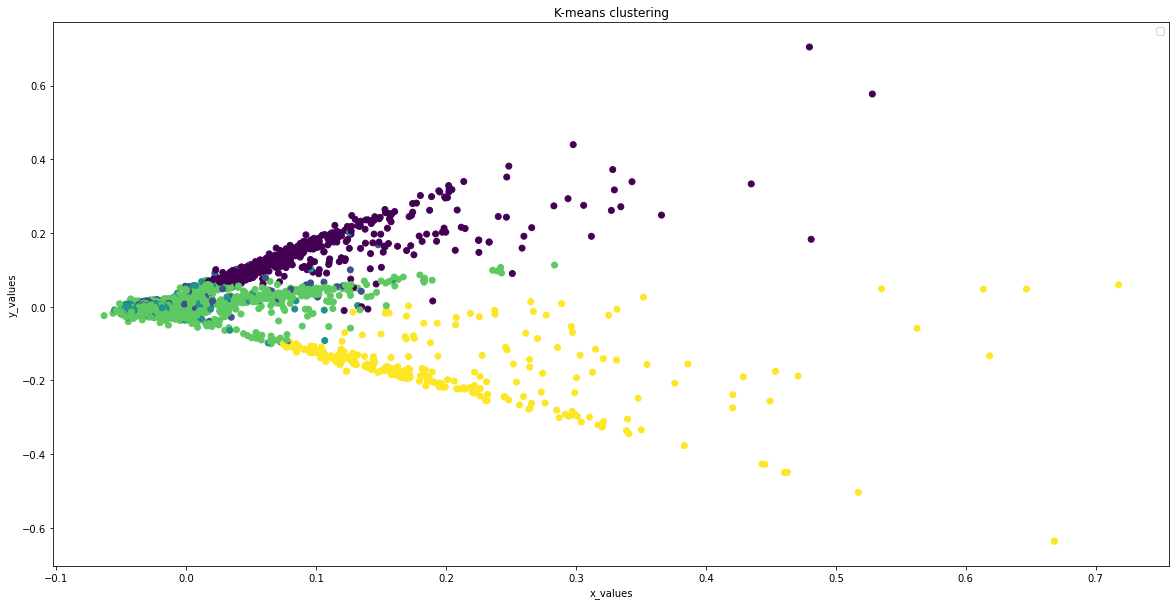

In [42]:
# Plot the clusters
from sklearn.decomposition import PCA

# create a pca object
pca = PCA(n_components=2)

# fit the pca object to the vectorizer
pca.fit(X.toarray())

# get the first two principal components
data2D = pca.transform(X.toarray())

# plot the clusters
plt.figure(figsize=(20,10))
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
# Add legend, title and axis names
plt.legend()
plt.title('K-means clustering')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [43]:
# Check the top 10 words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Cluster 0:
 people
 white
 shit
 things
 good
 black
 world
 fuck
 rich
 life


Cluster 1:
 good
 thing
 right
 sure
 wing
 shit
 white
 nigger
 women
 america


Cluster 2:
 time
 fucking
 shit
 fuck
 nigger
 real
 kike
 retarded
 country
 thing


Cluster 3:
 shit
 white
 women
 nigger
 fuck
 years
 country
 niggers
 world
 jewish


Cluster 4:
 jews
 white
 jewish
 people
 niggers
 whites
 race
 blacks
 history
 shit




c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
# Get 5 random comments from each cluster
for i in range(5):
    print("Cluster %d:" % i)
    for comment in df[df['cluster'] == i]['comment'].sample(5):
        print(' '.join(comment))
    print('\n')

Cluster 0:
their hand people footstools that
that food fetish people food bitch
most part dweeby incels white women they their genes white genepool white kids threat white people general
black culture white culture mental illness musk trump jail crazy white people
fuck they representation relative population they rate people


Cluster 1:
good useful good trump sure that wrong price great dosent
assyesyou foot high shoe right left
funny thing college first string backs they chance southerners niggerball hitler
trannies incels system attempt there such thing right wing incel
chamber thing perfect sense they


Cluster 2:
retarded kike women this your labor product that your time irrelevant shit
this woman your worldview short period time
glad opportunity first time wedding night wife struggle
danmark fuck otics their rules fucking cunt coward fuck elon user base hold your fucking nuts
highhalf gene pool polsih lithuanian time immigrants east tracing decent jewishno family trees


Cluster 

## Hate Metrics Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


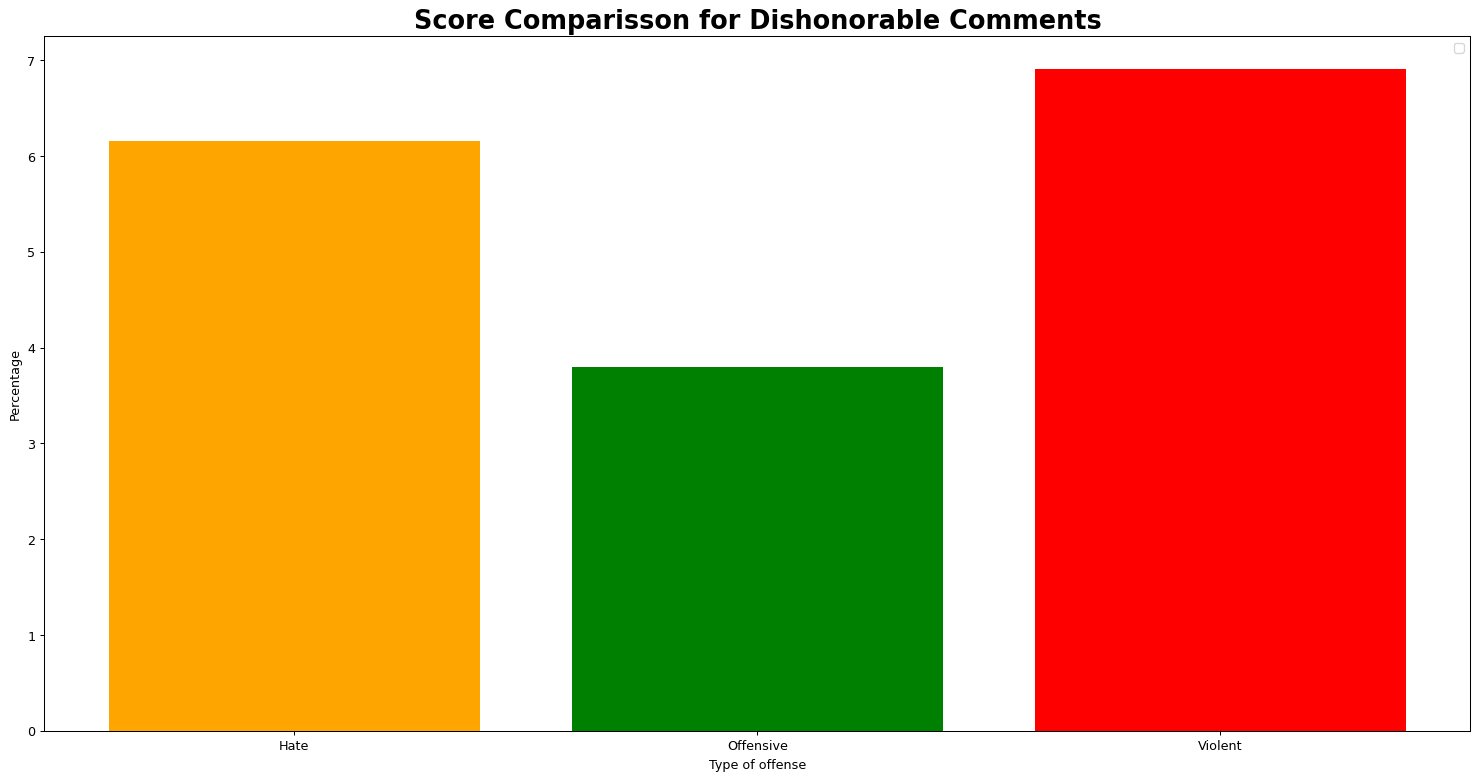

In [45]:
# lets do histogram of percentage of hate score, pct of offensive score, pct of violent score

values = [percentage_total_hate, percentage_total_offensive, percentage_total_violent]

plt.figure(figsize=(20,10), dpi= 92)
plt.bar(['Hate', 'Offensive', 'Violent'], values, color=['orange', 'green', 'red'])
plt.title('Score Comparisson for Dishonorable Comments', fontsize=20, fontweight='bold')
plt.xlabel('Type of offense')
plt.ylabel('Percentage')
plt.legend()
plt.show()